In [3]:
%load_ext autoreload
%autoreload 2

In [4]:
import numpy as np
from scipy import integrate, interpolate
import matplotlib.pyplot as plt
from importlib.resources import files

import MicroTools as micro
from MicroTools import unfolder
import MiniTools as mini
import const
import param_scan

from importlib.resources import files
from importlib.resources import open_text


In [5]:
mode='fhc'
bar=''

In [6]:
MC_data = np.genfromtxt(
        open_text(
            f"MiniTools.include.MB_data_release_numudis_2009.{mode}mode",
            f"miniboone_numu{bar}_ntuple.txt",
        )
    )
numu_data = np.genfromtxt(
        open_text(
            f"MiniTools.include.MB_data_release_numudis_2009.{mode}mode",
            f"miniboone_numu{bar}data_disap.txt",
        )
    )

fract_covariance = np.genfromtxt(
        open_text(
            f"MiniTools.include.MB_data_release_numudis_2009.{mode}mode",
            f"miniboone_frac_shape_matrix_numu{bar}_disap.txt",
        )
    )

    # energy bins -- same for nu and nubar
bin_e = np.genfromtxt(
        open_text(
            f"MiniTools.include.MB_data_release_numudis_2009.{mode}mode",
            f"miniboone_binboundaries_disap.txt",
        )
    )
bin_e *= 1e3
bin_widths = np.diff(bin_e)

/var/folders/dl/ccbsfs591r1fhgcws28m8xy40000gn/T/ipykernel_38078/2725951673.py:2: DeprecationWarning: open_text is deprecated. Use files() instead. Refer to https://importlib-resources.readthedocs.io/en/latest/using.html#migrating-from-legacy for migration advice.
  open_text(
/var/folders/dl/ccbsfs591r1fhgcws28m8xy40000gn/T/ipykernel_38078/2725951673.py:8: DeprecationWarning: open_text is deprecated. Use files() instead. Refer to https://importlib-resources.readthedocs.io/en/latest/using.html#migrating-from-legacy for migration advice.
  open_text(
/var/folders/dl/ccbsfs591r1fhgcws28m8xy40000gn/T/ipykernel_38078/2725951673.py:15: DeprecationWarning: open_text is deprecated. Use files() instead. Refer to https://importlib-resources.readthedocs.io/en/latest/using.html#migrating-from-legacy for migration advice.
  open_text(
/var/folders/dl/ccbsfs591r1fhgcws28m8xy40000gn/T/ipykernel_38078/2725951673.py:23: DeprecationWarning: open_text is deprecated. Use files() instead. Refer to https:/

In [7]:
MC_data_app = np.genfromtxt(
        open_text(
            f"MiniTools.include.MB_data_release_2020.{mode}mode",
            f"miniboone_numu{bar}nue{bar}fullosc_ntuple.txt",
        )
    )
nue_data_app = np.genfromtxt(
        open_text(
            f"MiniTools.include.MB_data_release_2020.{mode}mode",
            f"miniboone_nue{bar}data_lowe.txt",
        )
    )
numu_data_app = np.genfromtxt(
        open_text(
            f"MiniTools.include.MB_data_release_2020.{mode}mode",
            f"miniboone_numu{bar}data.txt",
        )
    )

nue_bkg_app = np.genfromtxt(
        open_text(
            f"MiniTools.include.MB_data_release_2020.{mode}mode",
            f"miniboone_nue{bar}bgr_lowe.txt",
        )
    )
numu_MC_app = np.genfromtxt(
        open_text(
            f"MiniTools.include.MB_data_release_2020.{mode}mode", f"miniboone_numu{bar}.txt"
        )
    )

fract_covariance_app = np.genfromtxt(
        open_text(
            f"MiniTools.include.MB_data_release_2020.{mode}mode",
            f"miniboone_full_fractcovmatrix_nu{bar}_lowe.txt",
        )
    )

    # energy bins -- same for nu and nubar
bin_e_app = np.genfromtxt(
        open_text(
            f"MiniTools.include.MB_data_release_2020.combined",
            f"miniboone_binboundaries_nue_lowe.txt",
        )
    )
bin_widths_app = np.diff(bin_e_app)
bin_edges_numu_app = np.array([0, 0.5, 0.7, 0.9, 1.1, 1.3, 1.50, 1.7, 1.9]) * 1e3  # MeV

/var/folders/dl/ccbsfs591r1fhgcws28m8xy40000gn/T/ipykernel_38078/3845048022.py:2: DeprecationWarning: open_text is deprecated. Use files() instead. Refer to https://importlib-resources.readthedocs.io/en/latest/using.html#migrating-from-legacy for migration advice.
  open_text(
/var/folders/dl/ccbsfs591r1fhgcws28m8xy40000gn/T/ipykernel_38078/3845048022.py:8: DeprecationWarning: open_text is deprecated. Use files() instead. Refer to https://importlib-resources.readthedocs.io/en/latest/using.html#migrating-from-legacy for migration advice.
  open_text(
/var/folders/dl/ccbsfs591r1fhgcws28m8xy40000gn/T/ipykernel_38078/3845048022.py:14: DeprecationWarning: open_text is deprecated. Use files() instead. Refer to https://importlib-resources.readthedocs.io/en/latest/using.html#migrating-from-legacy for migration advice.
  open_text(
/var/folders/dl/ccbsfs591r1fhgcws28m8xy40000gn/T/ipykernel_38078/3845048022.py:21: DeprecationWarning: open_text is deprecated. Use files() instead. Refer to https:/

In [8]:
MC_data_app_2018 = np.genfromtxt(
        open_text(
            f"MiniTools.include.MB_data_release_2018.{mode}mode",
            f"miniboone_numu{bar}nue{bar}fullosc_ntuple.txt",
        )
    )
nue_data_app_2018 = np.genfromtxt(
        open_text(
            f"MiniTools.include.MB_data_release_2018.{mode}mode",
            f"miniboone_nue{bar}data_lowe.txt",
        )
    )
numu_data_app_2018 = np.genfromtxt(
        open_text(
            f"MiniTools.include.MB_data_release_2018.{mode}mode",
            f"miniboone_numu{bar}data.txt",
        )
    )

nue_bkg_app_2018 = np.genfromtxt(
        open_text(
            f"MiniTools.include.MB_data_release_2018.{mode}mode",
            f"miniboone_nue{bar}bgr_lowe.txt",
        )
    )
numu_MC_app_2018 = np.genfromtxt(
        open_text(
            f"MiniTools.include.MB_data_release_2018.{mode}mode", f"miniboone_numu{bar}.txt"
        )
    )

fract_covariance_app_2018 = np.genfromtxt(
        open_text(
            f"MiniTools.include.MB_data_release_2018.{mode}mode",
            f"miniboone_full_fractcovmatrix_nu{bar}_lowe.txt",
        )
    )

    # energy bins -- same for nu and nubar
bin_e_app_2018 = np.genfromtxt(
        open_text(
            f"MiniTools.include.MB_data_release_2018.fhcmode",
            f"miniboone_binboundaries_nue_lowe.txt",
        )
    )
bin_widths_app_2018 = np.diff(bin_e_app_2018)
bin_edges_numu_app_2018 = np.array([0, 0.5, 0.7, 0.9, 1.1, 1.3, 1.50, 1.7, 1.9]) * 1e3  # MeV

/var/folders/dl/ccbsfs591r1fhgcws28m8xy40000gn/T/ipykernel_38078/4061615260.py:2: DeprecationWarning: open_text is deprecated. Use files() instead. Refer to https://importlib-resources.readthedocs.io/en/latest/using.html#migrating-from-legacy for migration advice.
  open_text(
/var/folders/dl/ccbsfs591r1fhgcws28m8xy40000gn/T/ipykernel_38078/4061615260.py:8: DeprecationWarning: open_text is deprecated. Use files() instead. Refer to https://importlib-resources.readthedocs.io/en/latest/using.html#migrating-from-legacy for migration advice.
  open_text(
/var/folders/dl/ccbsfs591r1fhgcws28m8xy40000gn/T/ipykernel_38078/4061615260.py:14: DeprecationWarning: open_text is deprecated. Use files() instead. Refer to https://importlib-resources.readthedocs.io/en/latest/using.html#migrating-from-legacy for migration advice.
  open_text(
/var/folders/dl/ccbsfs591r1fhgcws28m8xy40000gn/T/ipykernel_38078/4061615260.py:21: DeprecationWarning: open_text is deprecated. Use files() instead. Refer to https:/

In [9]:
MC_data_app_2012 = np.genfromtxt(
        open_text(
            f"MiniTools.include.MB_data_release_2012.{mode}mode",
            f"miniboone_numu{bar}nue{bar}fullosc_ntuple.txt",
        )
    )
nue_data_app_2012 = np.genfromtxt(
        open_text(
            f"MiniTools.include.MB_data_release_2012.{mode}mode",
            f"miniboone_nue{bar}data_lowe.txt",
        )
    )
numu_data_app_2012 = np.genfromtxt(
        open_text(
            f"MiniTools.include.MB_data_release_2012.{mode}mode",
            f"miniboone_numu{bar}data.txt",
        )
    )

nue_bkg_app_2012 = np.genfromtxt(
        open_text(
            f"MiniTools.include.MB_data_release_2012.{mode}mode",
            f"miniboone_nue{bar}bgr_lowe.txt",
        )
    )
numu_MC_app_2012 = np.genfromtxt(
        open_text(
            f"MiniTools.include.MB_data_release_2012.{mode}mode", f"miniboone_numu{bar}.txt"
        )
    )

fract_covariance_app_2012 = np.genfromtxt(
        open_text(
            f"MiniTools.include.MB_data_release_2012.{mode}mode",
            f"miniboone_full_fractcovmatrix_nu{bar}_lowe.txt",
        )
    )

    # energy bins -- same for nu and nubar
bin_e_app_2012 = np.genfromtxt(
        open_text(
            f"MiniTools.include.MB_data_release_2012.fhcmode",
            f"miniboone_binboundaries_nue_lowe.txt",
        )
    )
bin_widths_app_2012 = np.diff(bin_e_app_2012)
bin_edges_numu_app_2012 = np.array([0, 0.5, 0.7, 0.9, 1.1, 1.3, 1.50, 1.7, 1.9]) * 1e3  # MeV

/var/folders/dl/ccbsfs591r1fhgcws28m8xy40000gn/T/ipykernel_38078/850314770.py:2: DeprecationWarning: open_text is deprecated. Use files() instead. Refer to https://importlib-resources.readthedocs.io/en/latest/using.html#migrating-from-legacy for migration advice.
  open_text(
/var/folders/dl/ccbsfs591r1fhgcws28m8xy40000gn/T/ipykernel_38078/850314770.py:8: DeprecationWarning: open_text is deprecated. Use files() instead. Refer to https://importlib-resources.readthedocs.io/en/latest/using.html#migrating-from-legacy for migration advice.
  open_text(
/var/folders/dl/ccbsfs591r1fhgcws28m8xy40000gn/T/ipykernel_38078/850314770.py:14: DeprecationWarning: open_text is deprecated. Use files() instead. Refer to https://importlib-resources.readthedocs.io/en/latest/using.html#migrating-from-legacy for migration advice.
  open_text(
/var/folders/dl/ccbsfs591r1fhgcws28m8xy40000gn/T/ipykernel_38078/850314770.py:21: DeprecationWarning: open_text is deprecated. Use files() instead. Refer to https://imp

In [10]:
MC_data_app_2009 = np.genfromtxt(
        open_text(
            f"MiniTools.include.MB_data_release_2009.{mode}mode",
            f"miniboone_numu{bar}nue{bar}fullosc_ntuple.txt",
        )
    )
nue_data_app_2009 = np.genfromtxt(
        open_text(
            f"MiniTools.include.MB_data_release_2009.{mode}mode",
            f"miniboone_nue{bar}data_lowe.txt",
        )
    )
numu_data_app_2009 = np.genfromtxt(
        open_text(
            f"MiniTools.include.MB_data_release_2009.{mode}mode",
            f"miniboone_numu{bar}data.txt",
        )
    )

nue_bkg_app_2009 = np.genfromtxt(
        open_text(
            f"MiniTools.include.MB_data_release_2009.{mode}mode",
            f"miniboone_nue{bar}bgr_lowe.txt",
        )
    )
numu_MC_app_2009 = np.genfromtxt(
        open_text(
            f"MiniTools.include.MB_data_release_2009.{mode}mode", f"miniboone_numu{bar}.txt"
        )
    )

fract_covariance_app_2009 = np.genfromtxt(
        open_text(
            f"MiniTools.include.MB_data_release_2009.{mode}mode",
            f"miniboone_full_fractcovmatrix_nu{bar}_lowe.txt",
        )
    )

    # energy bins -- same for nu and nubar
bin_e_app_2009 = np.genfromtxt(
        open_text(
            f"MiniTools.include.MB_data_release_2009.fhcmode",
            f"miniboone_binboundaries_lowe.txt",
        )
    )
bin_widths_app_2009 = np.diff(bin_e_app_2009)
bin_edges_numu_app_2009 = np.array([0, 0.5, 0.7, 0.9, 1.1, 1.3, 1.50, 1.7, 1.9]) * 1e3  # MeV

/var/folders/dl/ccbsfs591r1fhgcws28m8xy40000gn/T/ipykernel_38078/74215449.py:2: DeprecationWarning: open_text is deprecated. Use files() instead. Refer to https://importlib-resources.readthedocs.io/en/latest/using.html#migrating-from-legacy for migration advice.
  open_text(
/var/folders/dl/ccbsfs591r1fhgcws28m8xy40000gn/T/ipykernel_38078/74215449.py:8: DeprecationWarning: open_text is deprecated. Use files() instead. Refer to https://importlib-resources.readthedocs.io/en/latest/using.html#migrating-from-legacy for migration advice.
  open_text(
/var/folders/dl/ccbsfs591r1fhgcws28m8xy40000gn/T/ipykernel_38078/74215449.py:14: DeprecationWarning: open_text is deprecated. Use files() instead. Refer to https://importlib-resources.readthedocs.io/en/latest/using.html#migrating-from-legacy for migration advice.
  open_text(
/var/folders/dl/ccbsfs591r1fhgcws28m8xy40000gn/T/ipykernel_38078/74215449.py:21: DeprecationWarning: open_text is deprecated. Use files() instead. Refer to https://importl

In [11]:
# Load the MiniBooNE MC from data release\
Ereco = MC_data[:, 1]*1e3 # MeV
Etrue = MC_data[:, 2]*1e3 # MeV
Length = MC_data[:, 3] # Kilometers
if mode=='fhc':
    RELATIVE_POTS_09_to_20_dis = 5.58 / 18.75
    Weight = MC_data[:, 4] / np.sum(MC_data[:, 4]) * 1.90454e5 / RELATIVE_POTS_09_to_20_dis
else:
    RELATIVE_POTS_09_to_20_dis =  3.39 / 11.27
    Weight = MC_data[:, 4] / np.sum(MC_data[:, 4]) * 2.7053e4 / RELATIVE_POTS_09_to_20_dis

In [12]:
# Load the MiniBooNE MC from data release\
Ereco_app = MC_data_app[:, 0] # MeV
Etrue_app = MC_data_app[:, 1] # MeV
Length_app = MC_data_app[:, 2] / 1e5  # Kilometers
Weight_app = MC_data_app[:, 3] / len(MC_data_app[:, 3])

# Load the MiniBooNE MC from data release\
if mode == 'fhc':
    RELATIVE_POTS_18_to_20 = 12.84 / 18.75
else:
    RELATIVE_POTS_18_to_20 = 11.27 / 11.27 # Same dataset

Ereco_app_2018 = MC_data_app_2018[:, 0] # MeV
Etrue_app_2018 = MC_data_app_2018[:, 1] # MeV
Length_app_2018 = MC_data_app_2018[:, 2] / 1e5  # Kilometers
Weight_app_2018 = MC_data_app_2018[:, 3] / len(MC_data_app_2018[:, 3]) / RELATIVE_POTS_18_to_20

# Load the MiniBooNE MC from data release\
if mode == 'fhc':
    RELATIVE_POTS_12_to_20 = 6.46 / 18.75
else:
    RELATIVE_POTS_12_to_20 = 11.27 / 11.27 # Same dataset

Ereco_app_2012 = MC_data_app_2012[:, 0] # MeV
Etrue_app_2012 = MC_data_app_2012[:, 1] # MeV
Length_app_2012 = MC_data_app_2012[:, 2] / 1e5  # Kilometers
Weight_app_2012 = MC_data_app_2012[:, 3] / len(MC_data_app_2012[:, 3]) / RELATIVE_POTS_12_to_20


# Load the MiniBooNE MC from data release\
if mode == 'fhc':
    RELATIVE_POTS_09_to_20 = 6.46 / 18.75
else:
    RELATIVE_POTS_09_to_20 = 3.39 / 11.27

Ereco_app_2009 = MC_data_app_2009[:, 0] # MeV
Etrue_app_2009 = MC_data_app_2009[:, 1] # MeV
Length_app_2009 = MC_data_app_2009[:, 2] / 1e5  # Kilometers
Weight_app_2009 = MC_data_app_2009[:, 3] / len(MC_data_app_2009[:, 3]) / RELATIVE_POTS_09_to_20

In [13]:
MC_numu, _ = np.histogram(Ereco, weights=Weight, bins=bin_edges_numu_app, density=False)

numu_MC_app_2009.sum()/RELATIVE_POTS_09_to_20, numu_MC_app_2012.sum()/RELATIVE_POTS_12_to_20, numu_MC_app_2018.sum()/RELATIVE_POTS_18_to_20, numu_MC_app.sum(), MC_numu.sum(), numu_data.sum()/RELATIVE_POTS_09_to_20_dis

(339502.6799535603,
 339345.9911958204,
 339345.99220210285,
 339345.992202,
 639966.3978494633,
 639966.3978494623)

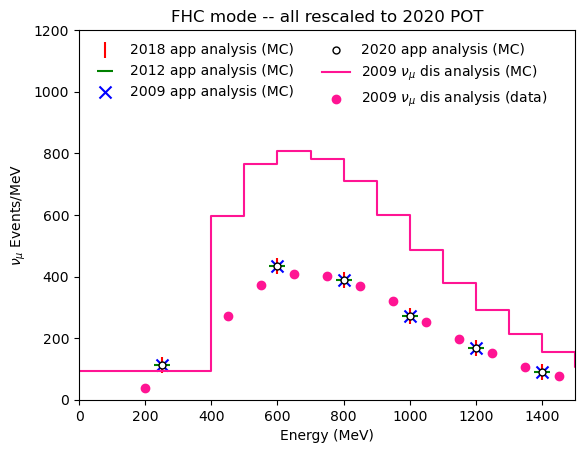

In [14]:
norm_numu_app = np.diff(bin_edges_numu_app)
bin_c = bin_edges_numu_app[:-1] + np.diff(bin_edges_numu_app)/2
plt.scatter(bin_c, numu_MC_app_2018/RELATIVE_POTS_18_to_20/norm_numu_app, color='red', marker='|', s=120, label=r'2018 app analysis (MC)')
plt.scatter(bin_c, numu_MC_app_2012/RELATIVE_POTS_12_to_20/norm_numu_app, color='green', marker='_', s=120, label=r'2012 app analysis (MC)')
plt.scatter(bin_c, numu_MC_app_2009/RELATIVE_POTS_09_to_20/norm_numu_app, color='blue', marker='x', s=75, label=r'2009 app analysis (MC)')
plt.scatter(bin_c, numu_MC_app/norm_numu_app, facecolor='white', edgecolor='black', marker='.', s=100, label=r'2020 app analysis (MC)')


# MC_numu, _ = np.histogram(Ereco, weights=Weight, bins=bin_edges_numu_app, density=False)
# plt.step(bin_edges_numu_app[:-1], (MC_numu)/norm_numu_app, where='post', color='dodgerblue', label=r'2009 $\nu_\mu$ dis release (MC)')
MC_numu, _ = np.histogram(Ereco, weights=Weight, bins=bin_e, density=False)
plt.step(bin_e[:-1], (MC_numu)/np.diff(bin_e), where='post', color='deeppink', label=r'2009 $\nu_\mu$ dis analysis (MC)')
plt.scatter(bin_e[:-1]+np.diff(bin_e)/2, numu_data/RELATIVE_POTS_09_to_20_dis/np.diff(bin_e)/2, color='deeppink', label=r'2009 $\nu_\mu$ dis analysis (data)')

plt.xlim(0,1500)
if mode == 'fhc':
    plt.ylim(0,1200)
    plt.ylabel(r'$\nu_\mu$ Events/MeV')
else:
    plt.ylim(0,140)
    plt.ylabel(r'$\overline{\nu}_\mu$ Events/MeV')
plt.xlabel('Energy (MeV)')
plt.legend(frameon=False, loc='upper left', ncol=2)
plt.title(f'{mode.upper()} mode -- all rescaled to 2020 POT')
plt.savefig(f'plots/comparison_numus_{mode}mode.pdf', dpi=300, bbox_inches='tight')

In [15]:
(190454/5.58)/ (27053/3.39)

4.2770090093957345

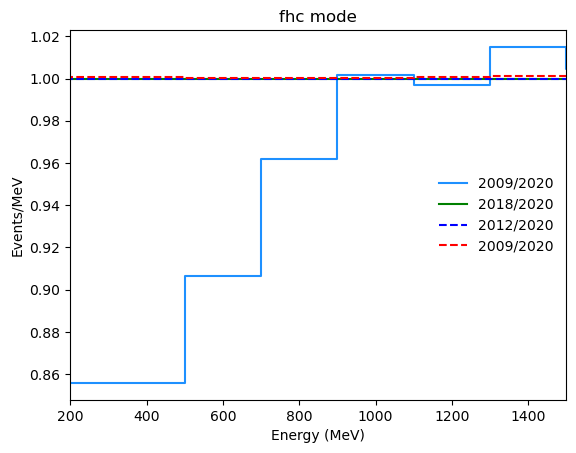

In [16]:
normalization = bin_widths
normalization = np.diff(bin_edges_numu_app)
MC_numu, _ = np.histogram(Ereco, weights=Weight, bins=bin_edges_numu_app, density=False)
plt.step(bin_edges_numu_app[:-1], MC_numu/numu_MC_app/2, where='post', color='dodgerblue', label=r'2009/2020')
plt.step(bin_edges_numu_app[:-1], numu_MC_app_2018/RELATIVE_POTS_18_to_20/numu_MC_app, where='post', color='green', label=r'2018/2020')
plt.step(bin_edges_numu_app[:-1], numu_MC_app_2012/RELATIVE_POTS_12_to_20/numu_MC_app, where='post', color='blue', ls='--', label=r'2012/2020')
plt.step(bin_edges_numu_app[:-1], numu_MC_app_2009/RELATIVE_POTS_09_to_20/numu_MC_app, where='post', color='red', ls='--', label=r'2009/2020')

plt.xlim(200,1500)
# plt.ylim(0,600)
plt.ylabel('Events/MeV')
plt.xlabel('Energy (MeV)')
plt.legend(frameon=False, loc='center right')
plt.title(f'{mode} mode')
plt.savefig(f'plots/comparison_numus_{mode}mode.pdf', dpi=300, bbox_inches='tight')

# Building Migration Matrix

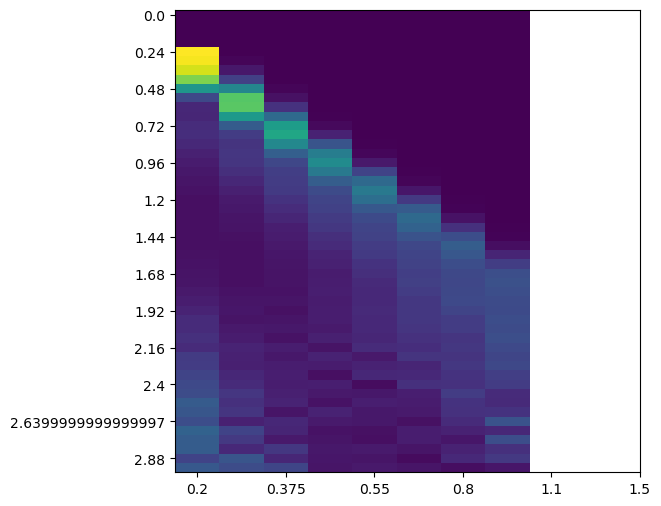

In [ ]:
migration_matrix_official_bins_numu = param_scan.create_reco_migration_matrix(
    ereco_bins = param_scan.MB_Ereco_official_bins_numu,
    etrue_bins = param_scan.e_prod_e_int_bins,
    ereco_events = param_scan.Enumu_reco,
    etrue_events = param_scan.Enumu_true,
    weights = param_scan.Weight_numu
) 

migration_matrix_official_bins_nue_11bins = param_scan.create_reco_migration_matrix(
    ereco_bins = param_scan.MB_Ereco_official_bins,
    etrue_bins = param_scan.e_prod_e_int_bins,
    ereco_events = param_scan.Ereco,
    etrue_events = param_scan.Etrue,
    weights = param_scan.Weight
) 

migration_matrix_official_bins_nue_13bins = param_scan.create_reco_migration_matrix(
    ereco_bins = param_scan.MB_Ereco_unfold_bins,
    etrue_bins = param_scan.e_prod_e_int_bins,
    ereco_events = param_scan.Ereco,
    etrue_events = param_scan.Etrue,
    weights = param_scan.Weight
) 

np.save('MiniTools/include/migration_matrices/migration_matrix_official_bins_numu.npy', migration_matrix_official_bins_numu)
np.save('MiniTools/include/migration_matrices/migration_matrix_official_bins_nue_11bins.npy', migration_matrix_official_bins_nue_11bins)
np.save('MiniTools/include/migration_matrices/migration_matrix_official_bins_nue_13bins.npy', migration_matrix_official_bins_nue_13bins)


migration_matrix_official_bins_numu = np.load('MiniTools/include/migration_matrices/migration_matrix_official_bins_numu.npy', allow_pickle=True)
migration_matrix_official_bins_nue_11bins = np.load('MiniTools/include/migration_matrices/migration_matrix_official_bins_nue_11bins.npy', allow_pickle=True)
migration_matrix_official_bins_nue_13bins = np.load('MiniTools/include/migration_matrices/migration_matrix_official_bins_nue_13bins.npy', allow_pickle=True)


fig, ax = plt.subplots(figsize=(6,6))

ax.imshow(migration_matrix_official_bins_numu)
# ax.imshow(migration_matrix_official_bins_nue_11bins)
# ax.imshow(migration_matrix_official_bins_nue_13bins)
x = param_scan.MB_Ereco_official_bins
y = param_scan.e_prod_e_int_bins
ax.set_xticks(np.arange(len(x[::2]))*2)
ax.set_xticklabels(x[::2])

ax.set_yticks(np.arange(len(y[::4]))*4)
ax.set_yticklabels(y[::4])
ax.set_aspect('auto')

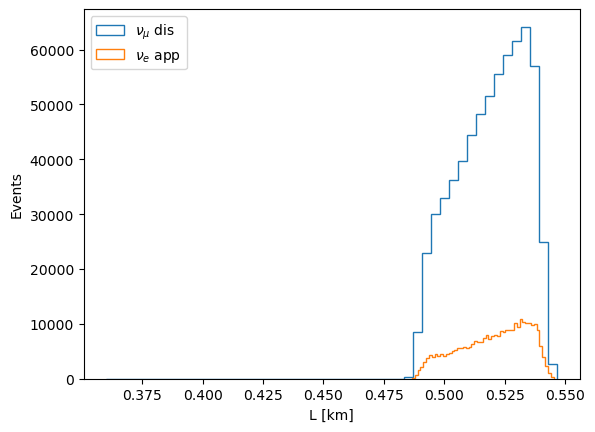

In [ ]:
_=plt.hist(Length, bins=50, weights=Weight, fc='orange', histtype='step', density=False, label=r'$\nu_\mu$ dis')
_=plt.hist(Length_app, bins=50, weights=Weight_app, fc='dodgerblue', histtype='step', density=False, label=r'$\nu_e$ app')
plt.xlabel('L [km]')
plt.ylabel('Events')
plt.legend()

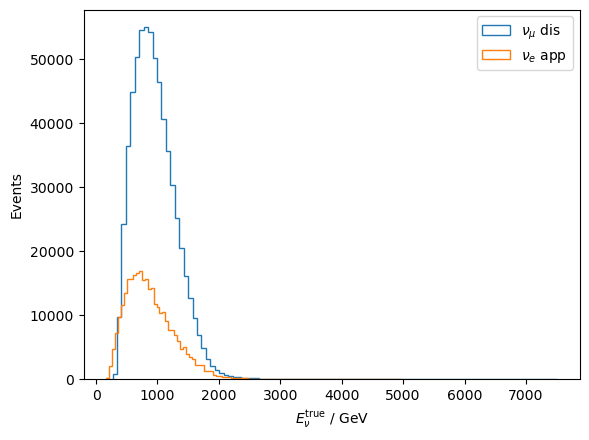

In [ ]:
_=plt.hist(Etrue, bins=100, weights=Weight, fc='orange', histtype='step', density=False, label=r'$\nu_\mu$ dis')
_=plt.hist(Etrue_app, bins=100, weights=Weight_app, fc='dodgerblue', histtype='step', density=False, label=r'$\nu_e$ app')
plt.xlabel(r'$E_\nu^{\rm true}$ / GeV')
plt.ylabel('Events')
plt.legend()
# plt.yscale('log')

## Testing the parameter scan functions

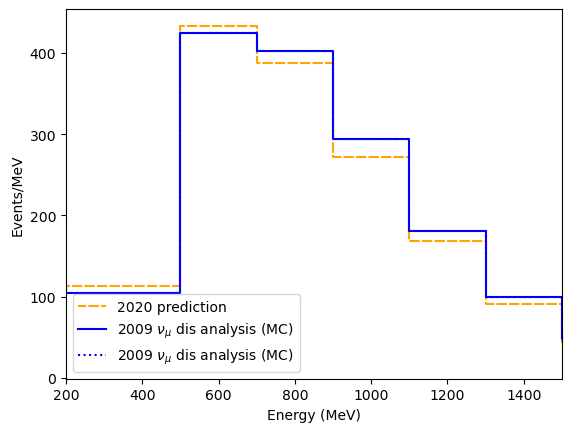

In [ ]:
MC_numus_from_nue_events = np.dot(
            np.histogram(
                Etrue_app*1e-3, bins=param_scan.e_prod_e_int_bins, weights=Weight_app
            )[0],
            mini.apps.migration_matrix_official_bins_numu,
            )

MC_numus_from_numu_events = np.dot(
            np.histogram(
                Etrue*1e-3, bins=param_scan.e_prod_e_int_bins, weights=Weight
            )[0],
            mini.apps.migration_matrix_official_bins_numu,
            )

normalization = np.diff(bin_edges_numu_app)
plt.step(bin_edges_numu_app[:-1], numu_MC_app/normalization, where='post', color='orange', label=r'2020 prediction', ls=(1,(5,1)))
# plt.step(bin_edges_numu_app[:-1], MC_numus_from_nue_events/normalization, where='post', color='orange', label='2020 MC')
# plt.step(bin_edges_numu_app[:-1], MC_numus_from_numu_events/normalization/1.85, where='post', color='red', label='2020 MC')

MC_numu, _ = np.histogram(Ereco, weights=Weight, bins=bin_edges_numu_app, density=False)
bin_c = (bin_edges_numu_app[:-1] + bin_edges_numu_app[1:])/2
plt.step(bin_edges_numu_app[:-1], (MC_numu)/normalization/1.85, where='post', color='blue', label=r'2009 $\nu_\mu$ dis analysis (MC)')
plt.step(bin_edges_numu_app[:-1], (MC_numu)/normalization/1.85, where='post', color='blue', label=r'2009 $\nu_\mu$ dis analysis (MC)', ls=':')

plt.xlim(200,1500)
plt.ylabel('Events/MeV')
plt.xlabel('Energy (MeV)')
plt.legend()


In [30]:
%%prun
params = {'g': 1, 'Ue4Sq': 1e-1, 'Um4Sq': 2e-2, 'm4': 1}
param_scan.DecayReturnMicroBooNEChi2(params, oscillations=True, use_numudis_2009_MC=True, decay=False, decouple_decay=True, disappearance=True, energy_degradation=False, n_replications=10)

         17414 function calls (17401 primitive calls) in 0.572 seconds

   Ordered by: internal time

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
      137    0.154    0.001    0.154    0.001 param_scan.py:210(_Fosc)
        4    0.065    0.016    0.065    0.016 param_scan.py:223(_Fdec)
        5    0.064    0.013    0.064    0.013 param_scan.py:81(numba_histogram)
     3018    0.058    0.000    0.058    0.000 param_scan.py:202(Ldec)
        2    0.049    0.025    0.049    0.025 param_scan.py:70(create_Etrue_and_Weight_int)
        2    0.036    0.018    0.038    0.019 inclusive_osc_tools.py:491(Decay_muB_OscChi2)
        2    0.035    0.018    0.361    0.181 param_scan.py:319(Pmm)
        6    0.024    0.004    0.024    0.004 param_scan.py:59(replicate)
        4    0.021    0.005    0.129    0.032 param_scan.py:228(Fdecay)
      137    0.016    0.000    0.016    0.000 param_scan.py:206(Losc)
        4    0.014    0.003    0.014    0.003 param_scan.py:451(d

In [ ]:
%%prun
for i in range(100):
    params = {'g': 1, 'Ue4Sq': 1e-1, 'Um4Sq': 2e-2, 'm4': 1}
    param_scan.DecayReturnMicroBooNEChi2(params, oscillations=True, decay=False, decouple_decay=True, disappearance=True, energy_degradation=False, n_replications=10)

         1808196 function calls (1806896 primitive calls) in 5.122 seconds

   Ordered by: internal time

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
      200    3.288    0.016    3.465    0.017 inclusive_osc_tools.py:491(Decay_muB_OscChi2)
   306600    0.205    0.000    0.245    0.000 param_scan.py:232(<lambda>)
      100    0.197    0.002    0.198    0.002 linalg.py:492(inv)
    14400    0.143    0.000    0.147    0.000 param_scan.py:208(_Fosc)
      400    0.117    0.000    0.117    0.000 param_scan.py:81(numba_histogram)
      200    0.106    0.001    0.111    0.001 _basic.py:903(inv)
    14200    0.105    0.000    0.136    0.000 function_base.py:24(linspace)
    14200    0.094    0.000    0.339    0.000 {built-in method scipy.integrate._quadpack._qagse}
      200    0.092    0.000    0.092    0.000 {built-in method numpy.core._multiarray_umath.interp}
   321200    0.073    0.000    0.073    0.000 param_scan.py:200(Ldec)
    27400    0.058    0.000    0